In [1]:
import soditools.soditools as u
import pandas as pd
import numpy as np

In [2]:
country_id = 'CO'

plp_file = f'UPSELL_{country_id}.csv'
plp_bucket = f'bucket_recommender_{country_id.lower()}'
plp_path = f'gs://{plp_bucket}/'

sandbox_file = f'UPSELL_{country_id}.csv'
sandbox_bucket = f'bucket_recommender_sandbox_{country_id.lower()}'
sandbox_path = f'gs://{sandbox_bucket}/'

In [3]:
# df = pd.read_csv(_path+_file)
df_plp = pd.read_csv(plp_path+plp_file)

In [4]:
df_plp.head()

,productId,upsell_a_pro,upsell_a_hogar,upsell_a_sin_segmento,upsell_b_pro,upsell_b_hogar,upsell_b_sin_segmento
0,281,NaN,NaN,482964|304617|660656|87728|660655|87729|522219...,NaN,NaN,NaN
1,837,NaN,NaN,00838|557687|557688|655724|00326|735019|00294|...,NaN,NaN,NaN
2,1343,NaN,NaN,551788|551789|331373|732109|697461|474702|7746...,NaN,NaN,NaN
3,2259,NaN,NaN,16997|17004|02266|02251|02264|02151|02173|5188...,NaN,NaN,NaN
4,2284,NaN,NaN,02228|02222|02253|02262|02233|02172|518889|021...,NaN,NaN,NaN


In [5]:
df_sandbox = pd.read_csv(sandbox_path+sandbox_file)

In [6]:
df_sandbox.head()

,productId,upsell_a_pro,upsell_a_hogar,upsell_a_sin_segmento,upsell_b_pro,upsell_b_hogar,upsell_b_sin_segmento
0,423,NaN,NaN,00424|66871|00422|58592|23767|227041|66821|551...,NaN,NaN,NaN
1,1960,NaN,NaN,553967|625253|689477|746104|500985|786407|7314...,NaN,NaN,NaN
2,2168,NaN,NaN,238978|34131|572771|238977|572767|238980|57276...,NaN,NaN,NaN
3,3637,NaN,NaN,551967|03644|312772|644084|276789|673816|23053...,NaN,NaN,NaN
4,3658,NaN,NaN,689251|689252|102147|214584|164329|519953|5199...,NaN,NaN,NaN


In [7]:
df_plp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438164 entries, 0 to 438163
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   productId              438164 non-null  int64  
 1   upsell_a_pro           0 non-null       float64
 2   upsell_a_hogar         0 non-null       float64
 3   upsell_a_sin_segmento  438164 non-null  object 
 4   upsell_b_pro           0 non-null       float64
 5   upsell_b_hogar         0 non-null       float64
 6   upsell_b_sin_segmento  0 non-null       float64
dtypes: float64(5), int64(1), object(1)
memory usage: 23.4+ MB


In [8]:
df_sandbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438164 entries, 0 to 438163
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   productId              438164 non-null  int64  
 1   upsell_a_pro           0 non-null       float64
 2   upsell_a_hogar         0 non-null       float64
 3   upsell_a_sin_segmento  438164 non-null  object 
 4   upsell_b_pro           0 non-null       float64
 5   upsell_b_hogar         0 non-null       float64
 6   upsell_b_sin_segmento  0 non-null       float64
dtypes: float64(5), int64(1), object(1)
memory usage: 23.4+ MB


In [9]:
_cols = ['productId','upsell_a_sin_segmento']
df = pd.merge(left=df_plp[_cols], right=df_sandbox[_cols], how='outer', on='productId', suffixes=['_plp','_sandbox'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438164 entries, 0 to 438163
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   productId                      438164 non-null  int64 
 1   upsell_a_sin_segmento_plp      438164 non-null  object
 2   upsell_a_sin_segmento_sandbox  438164 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.0+ MB


In [11]:
df.head()

,productId,upsell_a_sin_segmento_plp,upsell_a_sin_segmento_sandbox
0,281,482964|304617|660656|87728|660655|87729|522219...,304617|87728|308667|660655|522219|582283|87729...
1,837,00838|557687|557688|655724|00326|735019|00294|...,00838|557687|557688|00326|00294|00799|00797|00...
2,1343,551788|551789|331373|732109|697461|474702|7746...,551789|551788|331373|474703|732109|495475|7225...
3,2259,16997|17004|02266|02251|02264|02151|02173|5188...,17001|02251|02237|02235|02156|17041|02264|1242...
4,2284,02228|02222|02253|02262|02233|02172|518889|021...,02277|02194|02226|02233|02282|02247|02179|0217...


In [12]:
df.describe()

,productId
count,4.381640e+05
mean,5.170405e+05
std,1.765885e+05
min,2.100000e+02
25%,3.879938e+05
50%,5.236965e+05
75%,6.453722e+05
max,8.700427e+06


In [13]:
from typing import Tuple

def compare_lists(str_list1: str, str_list2: str, separator: str = "|") -> Tuple[float, float, float]:
    """
    Compara dos listas representadas como strings usando múltiples métricas:
    - Jaccard Similarity
    - Sorensen-Dice Coefficient
    - Overlap Coefficient
    
    :param str_list1: Primer string de elementos separados por el delimitador.
    :param str_list2: Segundo string de elementos separados por el delimitador.
    :param separator: Caracter que separa los elementos en los strings (por defecto "|").
    :return: (Jaccard, Dice, Overlap)
    """
    if not isinstance(str_list1, str):
        str_list1 = str(str_list1) if str_list1 is not None else ""

    if not isinstance(str_list2, str):
        str_list2 = str(str_list2) if str_list2 is not None else ""

    if not str_list1 or not str_list2:
        return (0.0, 0.0, 0.0)

    set1 = set(str_list1.split(separator))
    set2 = set(str_list2.split(separator))

    intersection = len(set1 & set2)
    union = len(set1 | set2)
    min_size = min(len(set1), len(set2))

    jaccard = intersection / union if union != 0 else 0.0
    dice = (2 * intersection) / (len(set1) + len(set2)) if (len(set1) + len(set2)) != 0 else 0.0
    overlap = intersection / min_size if min_size != 0 else 0.0

    return (jaccard, dice, overlap)

In [14]:
df.columns

Index(['productId', 'upsell_a_sin_segmento_plp',
       'upsell_a_sin_segmento_sandbox'],
      dtype='object')

In [15]:
df['sim_a_sin_segmento'] = df[['upsell_a_sin_segmento_plp','upsell_a_sin_segmento_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)

In [16]:
df.head(10)

,productId,upsell_a_sin_segmento_plp,upsell_a_sin_segmento_sandbox,sim_a_sin_segmento
0,281,482964|304617|660656|87728|660655|87729|522219...,304617|87728|308667|660655|522219|582283|87729...,0.80
1,837,00838|557687|557688|655724|00326|735019|00294|...,00838|557687|557688|00326|00294|00799|00797|00...,0.80
2,1343,551788|551789|331373|732109|697461|474702|7746...,551789|551788|331373|474703|732109|495475|7225...,0.35
3,2259,16997|17004|02266|02251|02264|02151|02173|5188...,17001|02251|02237|02235|02156|17041|02264|1242...,0.50
4,2284,02228|02222|02253|02262|02233|02172|518889|021...,02277|02194|02226|02233|02282|02247|02179|0217...,0.55
5,2372,436148|892095|892066|892106|892058|436147|8920...,892061|892036|892047|892056|892102|892009|8920...,0.65
6,2411,182085|182070|182069|182083|182080|182072|1820...,182085|182070|182083|182072|182073|182080|1820...,0.40
7,2631,60469|02628|101088|60470|414761|575050|101089|...,60469|101088|60470|101089|620882|703584|620894...,0.25
8,3394,624118|624415|500404|525423|614363|624410|6143...,614343|624355|742244|729766|522444|500404|1142...,0.15
9,5255,142191|142196|292578|147692|153295|147664|1532...,147692|292578|255907|142196|00609|186574|15330...,0.50


In [17]:
df[['sim_a_sin_segmento']].describe()

,sim_a_sin_segmento
count,438164.000000
mean,0.492072
std,0.298279
min,0.000000
25%,0.250000
50%,0.500000
75%,0.750000
max,1.000000


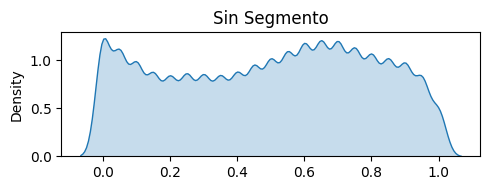

In [18]:
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize=(5,2), sharex=True)
# ax = ax.flat

sns.kdeplot(df['sim_a_sin_segmento'], fill=True, ax=ax)
ax.set_title('Sin Segmento')
ax.set_xlabel(None)
# sns.kdeplot(df['sim_b_pro'], fill=True, ax=ax[1])
# ax[1].set_title('Pro')
# ax[1].set_xlabel(None)
# sns.kdeplot(df['sim_b_hogar'], fill=True, ax=ax[2])
# ax[2].set_title('Hogar')
# ax[2].set_xlabel(None)


plt.tight_layout()

In [19]:
_threshold = .8
np.divide(df[df['sim_a_sin_segmento'] >= _threshold].shape[0], df.shape[0])

0.2121488757634128